# Разведочный анализ данных (EDA)

In [1]:
import pandas as pd
import json
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline
# !gdown --id 12ZK2_dILTS_22sNFtIOT7MjaojKPOQoo
# !gdown --id 1TeAXhAVS7TjFVpibo1Td_i-Xo5ZW3kt2

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 20
pd.options.display.max_rows = 10
pd.options.display.min_rows = 10

## 1. Оценка первого датасета.

In [2]:
df = pd.read_excel('region roles (26.05.22).xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69656 entries, 0 to 69655
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                69656 non-null  int64  
 1   id                        69656 non-null  int64  
 2   premium                   69656 non-null  bool   
 3   name                      69656 non-null  object 
 4   department                5263 non-null   object 
 5   has_test                  69656 non-null  bool   
 6   response_letter_required  69656 non-null  bool   
 7   area                      69656 non-null  object 
 8   salary                    37590 non-null  object 
 9   type                      69656 non-null  object 
 10  address                   40318 non-null  object 
 11  response_url              1 non-null      object 
 12  sort_point_distance       0 non-null      float64
 13  published_at              69656 non-null  object 
 14  create

In [4]:
df.head(5)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,working_days,working_time_intervals,working_time_modes,accept_temporary,description,experience,key_skills,specializations,region,immediate_redirect_url
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>В некоторых проектах Яндексу помогают компа...,"{'id': 'noExperience', 'name': 'Нет опыта'}",[],"[{'id': '1.172', 'name': 'Начальный уровень, М...",Астраханская область,NaN
1,1,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p><em><strong>Мы ищем талантливого и амбициоз...,"{'id': 'between1And3', 'name': 'От 1 года до 3...","[{'name': 'Git'}, {'name': 'SQL'}, {'name': 'Т...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
2,2,55116066,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<p>Лидер на рынке систем информационной безопа...,"{'id': 'between3And6', 'name': 'От 3 до 6 лет'}","[{'name': 'SQL'}, {'name': 'Linux'}, {'name': ...","[{'id': '1.221', 'name': 'Программирование, Ра...",Астраханская область,NaN
3,3,54031261,False,Ведущий Специалист по информационным технологиям,"{'id': 'pochta-4352-office', 'name': '«Почта Р...",False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 26000, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<ul> <li>Администрирование компьютерной сети</...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'Пользователь ПК'}, {'name': 'Работа...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN
4,4,55243040,False,Специалист по защите информации,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 20000, 'to': 20000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,[],[],[],False,<strong>Обязанности:</strong> <ul> <li>Обеспеч...,"{'id': 'noExperience', 'name': 'Нет опыта'}","[{'name': 'MS Dos'}, {'name': 'Диагностика ПК'...","[{'id': '1.110', 'name': 'Компьютерная безопас...",Астраханская область,NaN


#### Имеются пропуски в данных, большая часть данных в нечитаемом виде.

## 2. Очистка признаков.

In [5]:
# Удаляем неинформативные столбцы.

df.drop('immediate_redirect_url', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('premium', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('response_url', axis=1, inplace=True)
df.drop('response_letter_required', axis=1, inplace=True)
df.drop('has_test', axis=1, inplace=True)
df.drop('address', axis=1, inplace=True)
df.drop('sort_point_distance', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)
df.drop('insider_interview', axis=1, inplace=True)
df.drop('alternate_url', axis=1, inplace=True)
df.drop('working_days', axis=1, inplace=True)
df.drop('working_time_intervals', axis=1, inplace=True)
df.drop('working_time_modes', axis=1, inplace=True)
df.drop('accept_temporary', axis=1, inplace=True)
df.drop('contacts', axis=1, inplace=True)
df.drop('relations', axis=1, inplace=True)
df.drop('published_at', axis=1, inplace=True)
df.drop('created_at', axis=1, inplace=True)
df.drop('type', axis=1, inplace=True)

df.drop(df[df['archived'] == True].index, axis=0, inplace=True)
df.drop('archived', axis=1, inplace=True)



In [6]:
# Преобразуем ячейки сета в удобочитаемый вид.
course = {'RUR': 1, 'USD': 59.74, 'EUR': 59.53, 'KZT': 0.1254} # курс валют на 23.08.2022

def specializations(data):
    result = []
    for spec in eval(data):
        result.append((spec["name"],spec["profarea_name"]))
    return tuple(result)

def salary_eval(data, key):
    if data is np.nan:
        return np.nan
    try:
        salary = ast.literal_eval(data)
    except:
        return np.nan
    if not isinstance(salary, dict):
        return np.nan
    if salary.get(key) is None:
        return np.nan
    return salary[key] * course[salary['currency']]
# df['area'] = df['area'].apply(lambda x : ast.literal_eval(x)['name'])
df['key_skills'] = df['key_skills'].apply(lambda x : tuple([name['name'] for name in eval(x)]))
df['experience'] = df['experience'].apply(lambda x : ast.literal_eval(x)['name'])
df['department'] = df['department'].apply(lambda x : ast.literal_eval(x)['name'] if not(x is np.nan) else np.nan)
df['employer'] = df['employer'].apply(lambda x : ast.literal_eval(x)['name'])
df["schedule"] = df["schedule"].apply(lambda x : ast.literal_eval(x)['name'])
df['specializations'] = df['specializations'].apply(specializations)

df['salary_min'] = df.salary.apply(salary_eval, key='from')
df['salary_max'] = df.salary.apply(salary_eval, key='to')
df['salary_mean'] = df[['salary_min','salary_max']].mean(axis=1)

In [7]:
# Приводим основные профессиональные навыки к одинаковому написанию.
skills_dict = {'sql' : 'SQL', 'git' : 'Git', 'linux' : 'linux', 'python' : 'Python', 'java script' : 'Java Script',
               'javascript' : 'Java Script' ,'json' : 'JSON', 'js' : 'Java Script', 'xml' : 'XML', '1c' : '1C',
               '1 c' : '1C', '1с' : '1C', '1 с' : '1C', 'html' : 'HTML', 'css' : 'CSS', 'c#' : 'C#', 'с#' : 'C#',
               'php' : 'PHP', 'docker' : 'Docker', 'rest' : 'REST', 'nix' : 'nix', 'ооп' : 'ООП', 'jira' : 'Atlassian Jira ',
               'с++' : 'C++', 'c++' : 'C++', 'android' : 'Android', 'swift' : 'Swift/iOS', 'ios' : 'Swift/iOS',
               'kotlin' : 'Kotlin', 'tcp' : 'TCP/IP', 'информационные технологии' : 'Информационные технологии',
               'информационная безопасность': 'Информационная безопасность', 'dos': 'DOS', 'java' : 'Java', '.net' : ',NET'
              }

def key_skills_transformation(data):
    result = set()
    for skill in data:
        skill = skill.lower()
        added = False
        for key in skills_dict.keys():
            if key in skill:              
                added = True
                result.add(skills_dict[key])
                skill = skill.replace(key,'')
        if added == False:
            result.add(skill)                
    return tuple(result)

df['key_skills_tr'] = df.key_skills.apply(key_skills_transformation)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69652 entries, 0 to 69655
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             69652 non-null  object 
 1   department       5263 non-null   object 
 2   area             69652 non-null  object 
 3   salary           37586 non-null  object 
 4   employer         69652 non-null  object 
 5   snippet          69652 non-null  object 
 6   schedule         69652 non-null  object 
 7   description      69652 non-null  object 
 8   experience       69652 non-null  object 
 9   key_skills       69652 non-null  object 
 10  specializations  69652 non-null  object 
 11  region           69652 non-null  object 
 12  salary_min       34071 non-null  float64
 13  salary_max       19953 non-null  float64
 14  salary_mean      37586 non-null  float64
 15  key_skills_tr    69652 non-null  object 
dtypes: float64(3), object(13)
memory usage: 9.0+ MB


In [9]:
df.head(1)

,name,department,area,salary,employer,snippet,schedule,description,experience,key_skills,specializations,region,salary_min,salary_max,salary_mean,key_skills_tr
0,Младший специалист ручного тестирования,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,Яндекс,{'requirement': 'Внимательны и наблюдательны. ...,Удаленная работа,<p>В некоторых проектах Яндексу помогают компа...,Нет опыта,(),"((Начальный уровень, Мало опыта, Информационны...",Астраханская область,NaN,NaN,NaN,()


#### Удалили неинформативные признаки, и привели в читаемый вид необходимые для анализа.

In [10]:
df_first = df

## 3. Оценка второго датасета.

In [11]:
df = pd.read_excel('result roles (16.06.2022).xlsx')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                76382 non-null  int64 
 1   id                        76382 non-null  int64 
 2   premium                   76382 non-null  bool  
 3   name                      76382 non-null  object
 4   department                4902 non-null   object
 5   has_test                  76380 non-null  object
 6   response_letter_required  76382 non-null  object
 7   area                      76381 non-null  object
 8   salary                    40874 non-null  object
 9   type                      76379 non-null  object
 10  published_at              76380 non-null  object
 11  created_at                76381 non-null  object
 12  archived                  76380 non-null  object
 13  insider_interview         570 non-null    object
 14  url                   

In [13]:
df.head(5)

,Unnamed: 0,id,premium,name,department,has_test,response_letter_required,area,salary,type,...,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,0,49059633,False,Младший специалист ручного тестирования,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,54252278,False,Пентестер,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,54428119,False,Асессор-тестировщик,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,54429041,False,Тестировщик (асессор),NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,"{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,54653519,False,Тестировщик.Net,NaN,False,False,"{'id': '15', 'name': 'Астрахань', 'url': 'http...","{'from': 25000, 'to': 50000, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Имеются пропуски в данных, большая часть данных в нечитаемом виде.

## 4. Очистка признаков.

In [14]:
# Удаляем неинформативные столбцы.

df.drop('id', axis=1, inplace=True)
df.drop('premium', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('response_letter_required', axis=1, inplace=True)
df.drop('has_test', axis=1, inplace=True)
df.drop('url', axis=1, inplace=True)
df.drop('insider_interview', axis=1, inplace=True)
df.drop('alternate_url', axis=1, inplace=True)
df.drop('working_days', axis=1, inplace=True)
df.drop('working_time_intervals', axis=1, inplace=True)
df.drop('working_time_modes', axis=1, inplace=True)
df.drop('accept_temporary', axis=1, inplace=True)
df.drop('relations', axis=1, inplace=True)
df.drop('published_at', axis=1, inplace=True)
df.drop('created_at', axis=1, inplace=True)
df.drop('type', axis=1, inplace=True)
df.drop('archived', axis=1, inplace=True)

df.drop('Unnamed: 29', axis=1, inplace=True)
df.drop('Unnamed: 30', axis=1, inplace=True)
df.drop('Unnamed: 31', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)
df.drop('Unnamed: 33', axis=1, inplace=True)
df.drop('Unnamed: 34', axis=1, inplace=True)
df.drop('Unnamed: 35', axis=1, inplace=True)
df.drop('Unnamed: 36', axis=1, inplace=True)
df.drop('Unnamed: 37', axis=1, inplace=True)
df.drop('Unnamed: 38', axis=1, inplace=True)
df.drop('Unnamed: 39', axis=1, inplace=True)
df.drop('Unnamed: 40', axis=1, inplace=True)
df.drop('Unnamed: 41', axis=1, inplace=True)
df.drop('Unnamed: 42', axis=1, inplace=True)
df.drop('Unnamed: 43', axis=1, inplace=True)
df.drop('Unnamed: 44', axis=1, inplace=True)
df.drop('Unnamed: 45', axis=1, inplace=True)
df.drop('Unnamed: 46', axis=1, inplace=True)
df.drop('Unnamed: 47', axis=1, inplace=True)
df.drop('Unnamed: 48', axis=1, inplace=True)
df.drop('Unnamed: 49', axis=1, inplace=True)
df.drop('Unnamed: 50', axis=1, inplace=True)

In [15]:
# Преобразуем ячейки сета в удобочитаемый вид.
# Приводим основные профессиональные навыки к одинаковому написанию.

def change_experience(exp):
    try:
        return ast.literal_eval(exp)['name']
    except:
        return np.nan

def change_depart(department):
    try:
        return ast.literal_eval(department)['name']
    except:
        return np.nan
    
def change_employer(string):
    try:
        return ast.literal_eval(string)['name']
    except:
        return np.nan
    
def specializations(data):
    result = []
    try:
        for spec in eval(data):
            result.append((spec["name"],spec["profarea_name"]))
        return tuple(result)
    except:
        return tuple()

def change_skills(skills):
    try:
        return tuple(skill['name'] for skill in ast.literal_eval(skills))
    except:
        return ()

def change_schedule(string):
    try:
        return ast.literal_eval(string)['name']
    except:
        return np.nan
    
df['department'] = df['department'].apply(change_depart)
df['experience'] = df['experience'].apply(change_experience)
df['specializations'] = df['specializations'].apply(specializations)
df['schedule'] = df['schedule'].apply(change_schedule)
df['employer'] = df['employer'].apply(change_employer)
df['key_skills'] = df['key_skills'].apply(change_skills)
df['key_skills_tr'] = df.key_skills.apply(key_skills_transformation)
df['region'] = df['region'].where(df['region'].isin(df_first['region'].values),np.nan)

df['salary_min'] = df.salary.apply(salary_eval,key='from')
df['salary_max'] = df.salary.apply(salary_eval,key='to')
df['salary_mean'] = df[['salary_min','salary_max']].mean(axis=1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76382 entries, 0 to 76381
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             76382 non-null  object 
 1   department       4898 non-null   object 
 2   area             76381 non-null  object 
 3   salary           40874 non-null  object 
 4   employer         76377 non-null  object 
 5   snippet          76381 non-null  object 
 6   schedule         76379 non-null  object 
 7   description      76382 non-null  object 
 8   experience       76029 non-null  object 
 9   key_skills       76382 non-null  object 
 10  specializations  76382 non-null  object 
 11  region           76028 non-null  object 
 12  key_skills_tr    76382 non-null  object 
 13  salary_min       37175 non-null  float64
 14  salary_max       21767 non-null  float64
 15  salary_mean      40870 non-null  float64
dtypes: float64(3), object(13)
memory usage: 9.3+ MB


In [17]:
df.head(1)

,name,department,area,salary,employer,snippet,schedule,description,experience,key_skills,specializations,region,key_skills_tr,salary_min,salary_max,salary_mean
0,Младший специалист ручного тестирования,NaN,"{'id': '15', 'name': 'Астрахань', 'url': 'http...",NaN,Яндекс,{'requirement': 'Внимательны и наблюдательны. ...,Удаленная работа,<p>В некоторых проектах Яндексу помогают компа...,Нет опыта,(),"((Начальный уровень, Мало опыта, Информационны...",Астраханская область,(),NaN,NaN,NaN


#### Удалили неинформативные признаки, и привели в читаемый вид необходимые для анализа.

In [18]:
df_second = df

## 5. Отсортируем для анализа только IT вакансии.

In [19]:
# определим имена вакансий с 3-мя и более it-навыками, соберем новые датасеты с соответсвующими именами вакансий.

def sort_it(data):
    count = 0
    for skill in set(skills_dict.values()):
        if skill in data:
            count += 1
            if count == 3:
                return True
    return False

f1 = set(df_first[df_first.key_skills_tr.apply(sort_it)].name.values)
f2 = set(df_second[df_second.key_skills_tr.apply(sort_it)].name.values)
it_names = f1 | f2

df_first_it = df_first[df_first.name.apply(lambda x: True if x in it_names else False)]
df_second_it = df_second[df_second.name.apply(lambda x: True if x in it_names else False)]

df_first_notit = df_first[~df_first.name.apply(lambda x: True if x in it_names else False)]
df_second_notit = df_second[~df_second.name.apply(lambda x: True if x in it_names else False)]

In [20]:
# создадим лист датафремов для дальнейшей отрисовки и дадим им название.

list_df = [
    df_first_it,
    df_second_it,
#   df_first,
#   df_second,
#   df_first_notit,
#   df_second_notit,
] 
list_title = ['Данные за май, среди IT специалистов','Данные за июнь, среди IT специалистов',
              'Все данные за май', 'Все данные за июнь',
              'Данные за май, среди не IT специалистов','Данные за июнь, среди не IT специалистов']

#### Оба датасета готовы для дальнейшего анализа.

## 6. Проведем графический и неграфический анализ числовых данных.

In [21]:
df_first_it.describe()

,salary_min,salary_max,salary_mean
count,8916.000,5573.000,10076.000
mean,93376.246,139394.349,109472.113
std,64871.798,97051.857,76930.987
min,30.000,40.000,35.000
25%,45000.000,61500.000,50000.000
50%,80000.000,119480.000,89262.500
75%,120000.000,200000.000,150000.000
max,600000.000,1000000.000,750000.000


In [22]:
df_second_it.describe()

,salary_min,salary_max,salary_mean
count,10283.000,6470.000,11563.000
mean,94135.442,141614.678,110656.448
std,66801.632,102034.337,79994.188
min,1.000,40.000,35.000
25%,45000.000,63000.000,50000.000
50%,75000.000,120000.000,87000.000
75%,120000.000,200000.000,150000.000
max,574000.000,1000000.000,750000.000


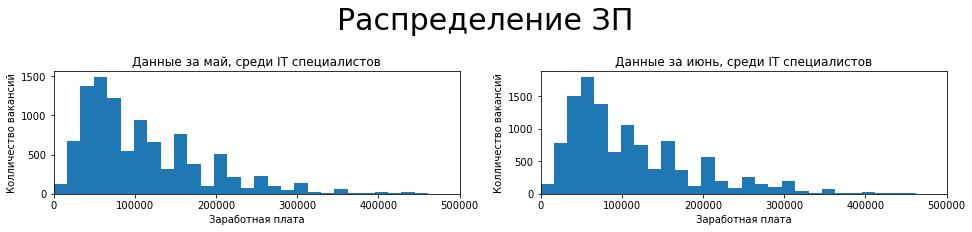

In [23]:
bins = 30

plt.figure(figsize=(16,9))
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.suptitle('Распределение ЗП', fontsize=30)

for numb in range(0,len(list_df)):
    plt.subplot(3, 2, numb+1)
    plt.title(list_title[numb])
    plt.xlabel('Заработная плата')
    plt.ylabel('Колличество вакансий')
    plt.hist(list_df[numb].salary_mean[list_df[numb].salary_mean < 500_000],bins=bins,)
    plt.xlim((0,500000))

#### Видно очень широкий диапазон зарплат обоих датасетов. Медианная зарплата обоих около 85 т.р.

## 7. Проведем анализ категориальных данных, а так же их взаимосвязь с заработной платой.

In [24]:
# Функция отрисовки статистических показателей.

def print_bplot(list_df, main_title='', sub_title=None, size=10, lim=None, order=None):
    
    subplt_columns = 2
    if isinstance(list_df, (pd.DataFrame ,pd.Series)):
        list_df = [list_df]
        subplt_columns = 1
    if sub_title is None:
        sub_title = [''] * len(list_df)
        
    colors = plt.cm.tab20.colors + plt.cm.tab20b.colors + plt.cm.tab20c.colors
    color_dict = {}
    index = 0

    plt.figure(figsize=(16,16))
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
    plt.suptitle(f'{main_title} ТОП-{size}', fontsize=30)

    for numb in range(len(list_df)):
        
        data = list_df[numb]
        
        if data.iloc[:,0].nunique() < size:
            size = data.iloc[:,0].nunique()
        categories = data[data.columns[0]].value_counts().index[:size]
        
        for i in categories:
            if color_dict.get(i) is None:
                color_dict[i] = colors[index]
                index +=1         
        
        data = data.set_index(data.columns[0]).loc[categories]

        plt.subplot(3, subplt_columns, numb+1)
        plt.title(list_title[numb])
        sns.boxplot(x=data.columns[0], y=data.index, data=data, order=order, palette=[color_dict[key] for key in categories])
        plt.grid()
        plt.ylabel('')
        plt.xlabel('Заработная плата')
        plt.yticks(ticks=[i for i in range(size)],labels=categories.str[:25] if order is None else order)
        plt.axis(xmin=0, xmax=lim)
    plt.show()

In [25]:
# Функция отрисовки диаграммы.
def print_pie(list_df, main_title=None, sub_title=None, size=10, figsize=(16,30), legend=True):
    
    subplt_columns = 2
    if isinstance(list_df, (pd.DataFrame ,pd.Series)):
        list_df = [list_df]
        subplt_columns = 1
    if sub_title is None:
        sub_title = [''] * len(list_df)
    explode=[0.15 for _ in range(size)]
    
    colors = plt.cm.tab20.colors + plt.cm.tab20b.colors + plt.cm.tab20c.colors
    color_dict = {}
    index = 0    

    plt.figure(figsize=figsize)
    plt.subplots_adjust(wspace=0.5, hspace=0.3)
    if not main_title is None:
        plt.suptitle(f'{main_title} ТОП-{size}',y=0.92, fontsize=30)

    for numb in range(len(list_df)):

        plt.subplot(3, subplt_columns, numb+1)
        
        data = list_df[numb].value_counts()[:size]
        labels = list_df[numb].value_counts()[:size].index

        for i in data.index:
            if color_dict.get(i) is None:
                color_dict[i] = colors[index]
                index +=1

        plt.pie(data,
                labels=['\n'.join([s[i:i+8] for i in range(0,len(s),8)]) for s in labels.str[:16]],
                autopct='%.1f%%',
                colors = [color_dict[key] for key in data.index],
                wedgeprops={'edgecolor':'black', 'linestyle': '-', 'antialiased':True},
                labeldistance=1.15,
                explode=explode,
                shadow=True)
        plt.title(sub_title[numb], y=1.07)
        if legend:
            plt.legend(labels=labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

    plt.show()

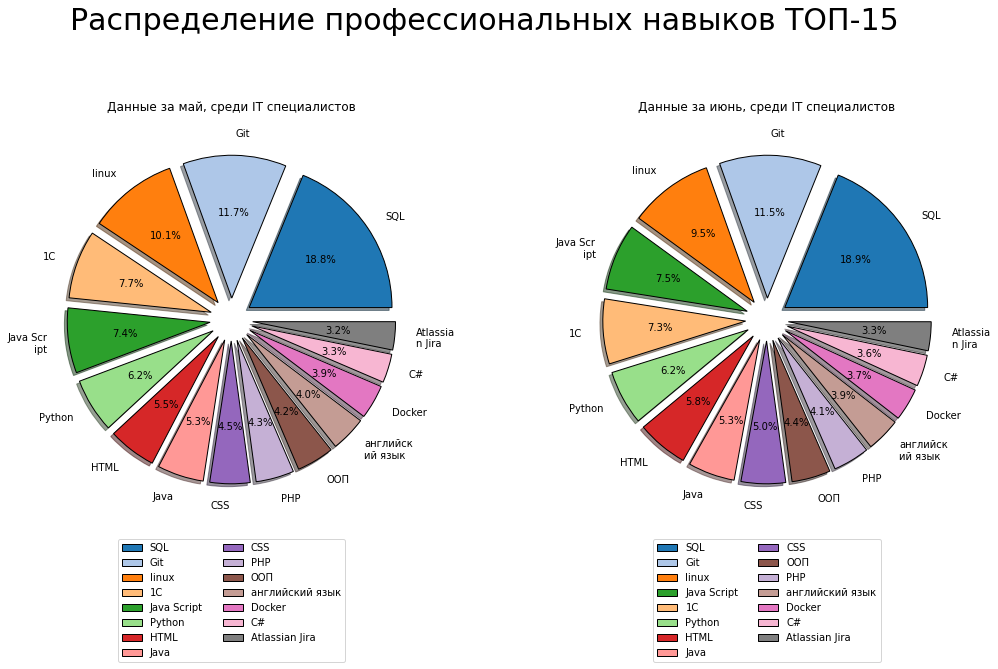

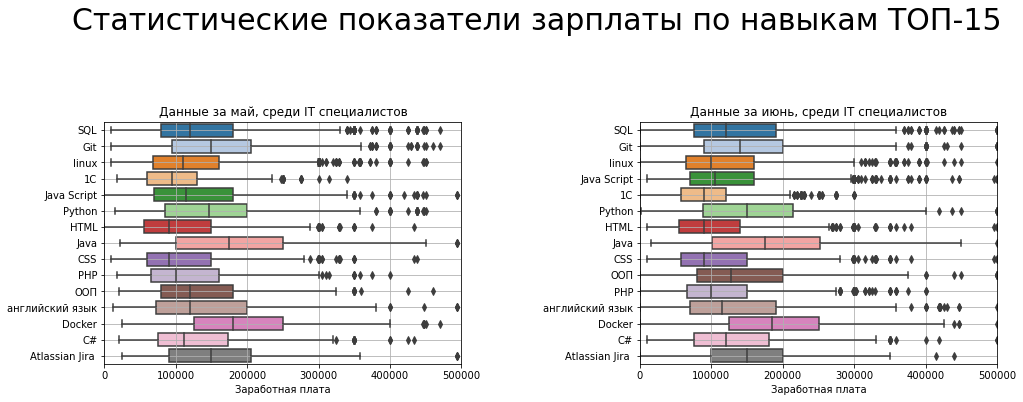

In [26]:
print_pie([df['key_skills_tr'].explode() for df in list_df], 
          main_title='Распределение профессиональных навыков',
          sub_title=list_title,
          size=15)
print_bplot([df[['key_skills_tr','salary_mean']].explode('key_skills_tr') for df in list_df], 
          main_title='Статистические показатели зарплаты по навыкам',
          sub_title=list_title,
          size=15,
          lim=500_000)

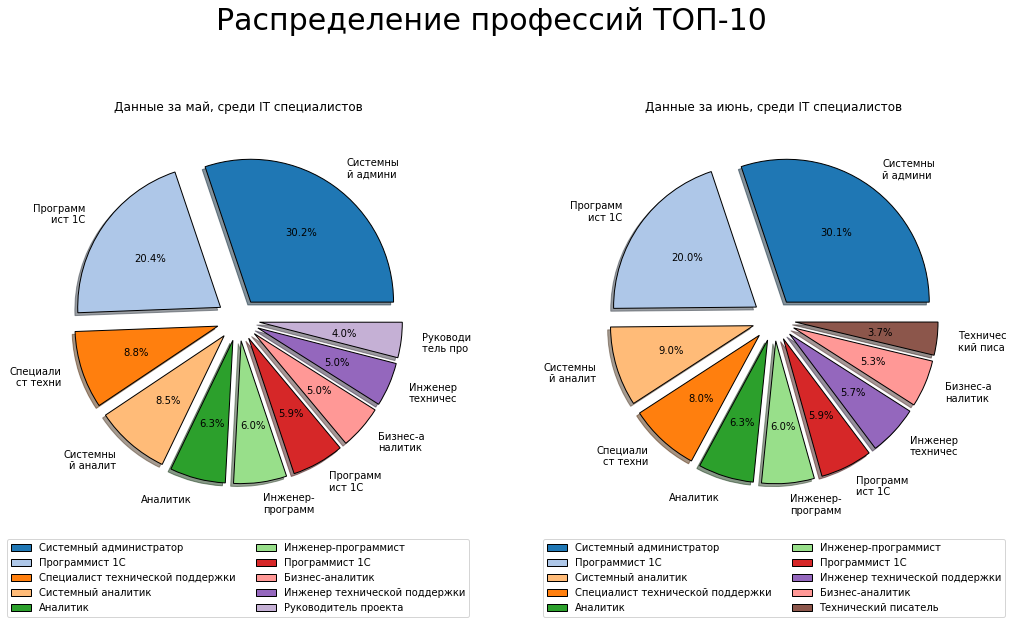

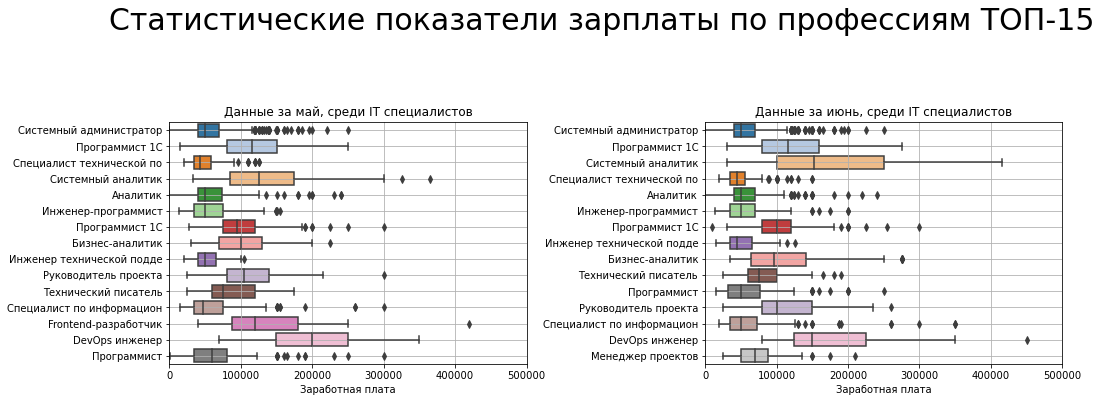

In [27]:
print_pie([df['name'] for df in list_df], 
          main_title='Распределение профессий',
          sub_title=list_title, size=10)
print_bplot([df[['name','salary_mean']] for df in list_df], 
          main_title='Статистические показатели зарплаты по профессиям',
          sub_title=list_title,
          size=15,
          lim=500_000)

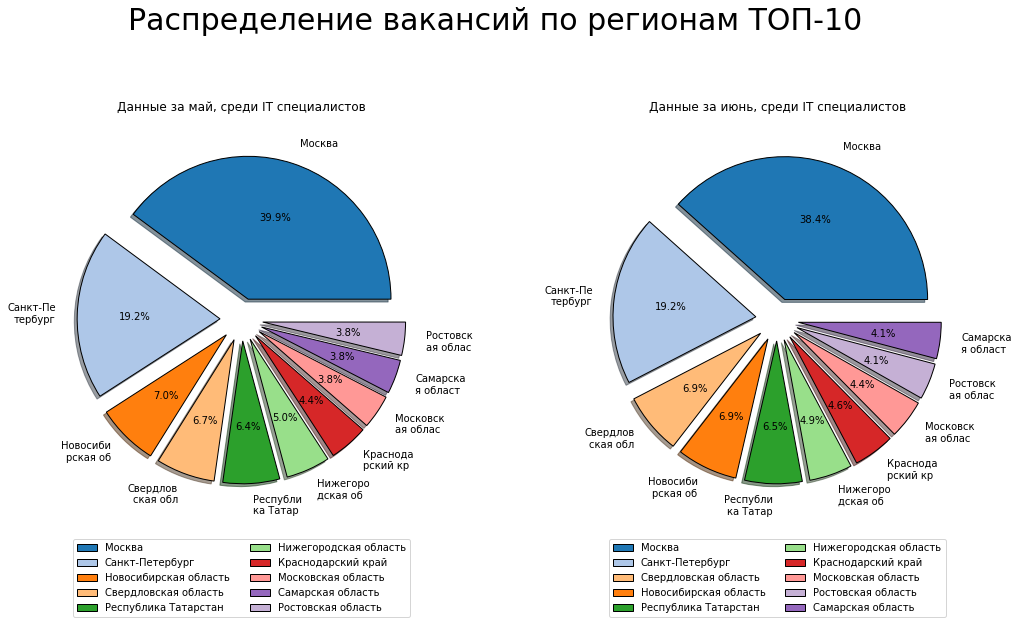

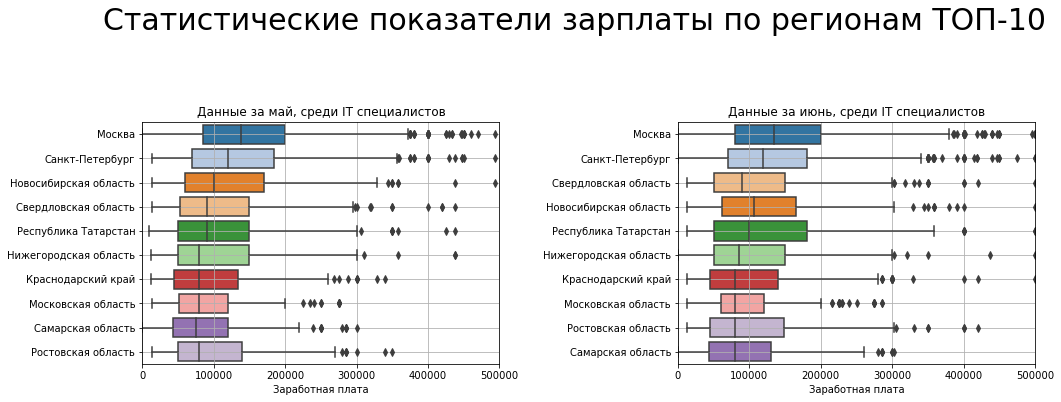

In [28]:
print_pie([df['region'] for df in list_df], 
          main_title='Распределение вакансий по регионам',
          sub_title=list_title, size=10)
print_bplot([df[['region','salary_mean']] for df in list_df], 
          main_title='Статистические показатели зарплаты по регионам',
          sub_title=list_title,
          size=10,
          lim=500_000)

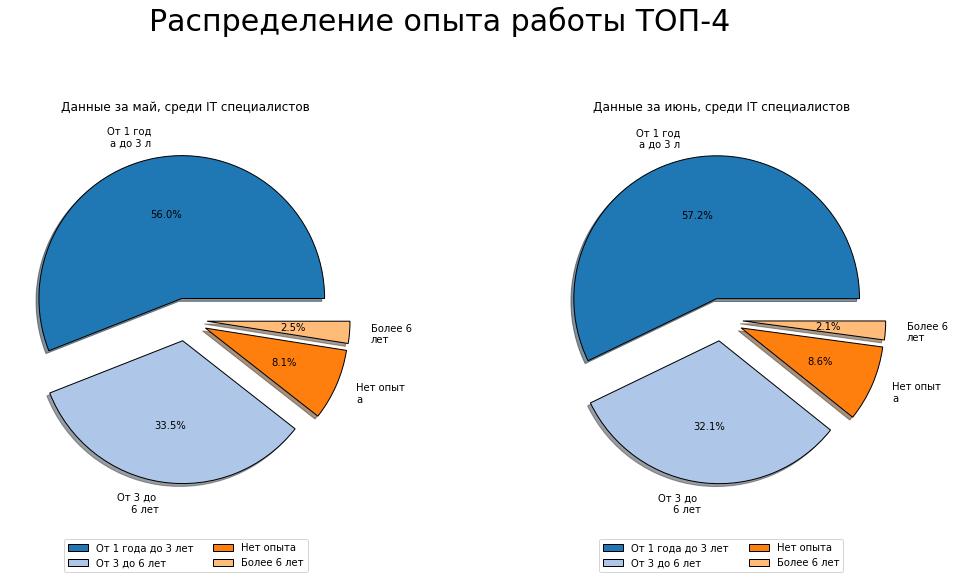

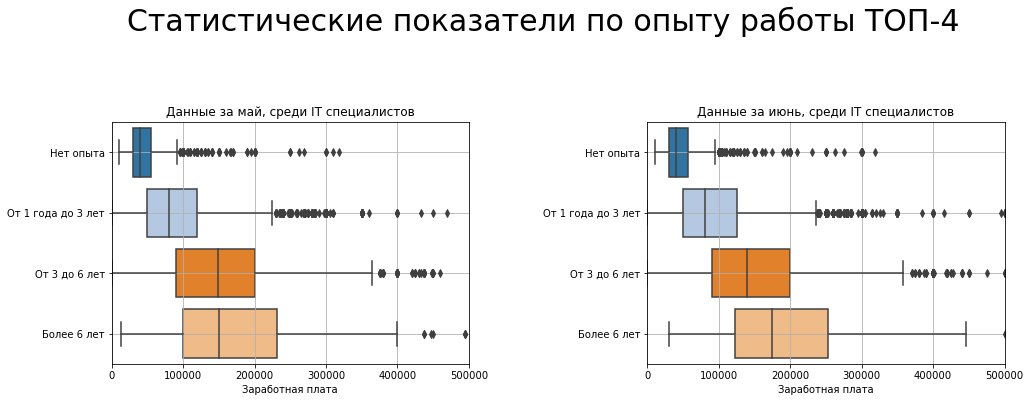

In [29]:
print_pie([df['experience'] for df in list_df], 
          main_title='Распределение опыта работы',
          sub_title=list_title, size=4)
print_bplot([df[['experience','salary_mean']] for df in list_df], 
          main_title='Статистические показатели по опыту работы',
          sub_title=list_title,
          size=4,
          lim=500_000,
          order=["Нет опыта", "От 1 года до 3 лет","От 3 до 6 лет","Более 6 лет"]
          )

In [30]:
df_all = pd.concat([df_first, df_second])
df_exp = df_all[['key_skills_tr', 'salary_mean']].explode('key_skills_tr')
order = df_exp.groupby('key_skills_tr')\
              .filter(lambda x: x['salary_mean']\
              .count() > 100)\
              .groupby('key_skills_tr')\
              .median()\
              .sort_values('salary_mean', ascending=False).index[:20]

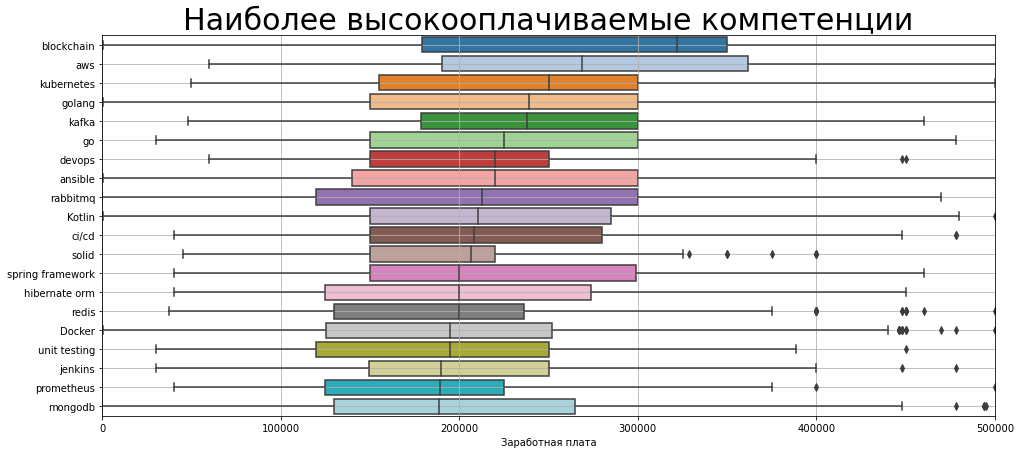

In [31]:
colors = plt.cm.tab20.colors + plt.cm.tab20b.colors + plt.cm.tab20c.colors
plt.figure(figsize=(16,7))
sns.boxplot(x=df_exp.columns[1], y=df_exp.columns[0], data=df_exp, order=order, palette=colors)
plt.grid()
plt.title('Наиболее высокооплачиваемые компетенции', fontsize=30)
plt.ylabel('')
plt.xlabel('Заработная плата')
plt.axis(xmin=0, xmax=500_000)
plt.show()

#### Присутвуют вполне очевидные корреляции ЗП и опыта работы, средней ЗП региона. </br> Определили наиболее востребованные IT навыки. Статистические показатели ЗП для них. <br/> Посчитали среднюю ЗП для крупных регионов. <br/> Определили наиболее оплачиваемые профессиональные навыки.

## Вывод:
&emsp; Провели неграфический анализ описательных статистик количественных данных, определили медианную зарплату. Обнаружили корреляцию заработной платы и опыта работы. Выявили регионы с наиболее высокой заработной платой. Определили наиболее востребованные навыки IT специалистов. Посчитали статистические показатели заработной платы для данных навыков. Провели анализ заработной платы с наиболее оплачиваемыми навыками. Посчитали статистические показатели заработной платы для крупных регионов.

In [32]:
list_df = [
    df_first_it,
    df_second_it,
    df_first,
    df_second,
    df_first_notit,
    df_second_notit,
]
list_names =  [
    'df_first_it',
    'df_second_it',
    'df_first',
    'df_second',
    'df_first_notit',
    'df_second_notit',
]

for i, df in enumerate(list_df):
    df[['name','salary_mean','experience','schedule','key_skills_tr','specializations','region']]\
            .to_csv(f'{list_names[i]}.csv', index=False, 
                    header=['name','salary','experience','schedule','skills','specializations','region'])

# Статистический анализ данных

In [33]:
list_names =  [
    'df_first_it',
    'df_second_it',
    'df_first',
    'df_second',
    'df_first_notit',
    'df_second_notit',
]

df_first_it, df_second_it, df_first, df_second, df_first_notit, df_second_notit = [pd.read_csv(f'{df}.csv') 
                                                                                   for df in list_names]

df_first_it['skills'] = df_first_it['skills'].apply(lambda x : ast.literal_eval(x))
df_first_it['specializations'] = df_first_it['specializations'].apply(lambda x : ast.literal_eval(x))

df_second_it['skills'] = df_second_it['skills'].apply(lambda x : ast.literal_eval(x))
df_second_it['specializations'] = df_second_it['specializations'].apply(lambda x : ast.literal_eval(x))

##  1. Структурируйте данные

In [34]:
df = pd.concat([df_first_it, df_second_it]).drop_duplicates().dropna()
df = df[(df['salary'] < 500000) & (df['salary'] > 9999)]
df.head(5)

,name,salary,experience,schedule,skills,specializations,region
0,Тестировщик.Net,37500.000,От 1 года до 3 лет,Полный день,"(SQL, тестирование, api, C#, Git)","((Программирование, Разработка, Информационные...",Астраханская область
2,Специалист по защите информации,20000.000,Нет опыта,Полный день,"(работа с компьютером, умение работать в услов...","((Компьютерная безопасность, Информационные те...",Астраханская область
3,Специалист по защите информации,17500.000,Нет опыта,Полный день,(),"((Компьютерная безопасность, Информационные те...",Астраханская область
4,Специалист по защите информации,27000.000,Нет опыта,Полный день,"(навыки настойки сзи, ms powerpoint, работа с ...","((Компьютерная безопасность, Информационные те...",Астраханская область
5,Специалист по информационной безопасности,15000.000,От 3 до 6 лет,Полный день,(),"((Компьютерная безопасность, Информационные те...",Астраханская область


## 2. Проанализируйте типы данных

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17233 entries, 0 to 24388
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             17233 non-null  object 
 1   salary           17233 non-null  float64
 2   experience       17233 non-null  object 
 3   schedule         17233 non-null  object 
 4   skills           17233 non-null  object 
 5   specializations  17233 non-null  object 
 6   region           17233 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.1+ MB


#### Типы данных для датасета:<br>
* name - Категориальные
* salary - Количественные
* schedule - Категориальные
* experience - Порядковые
* skills - Категориальные
* specializations - Категориальные
* region - Категориальные

## 3. Визуализация данных

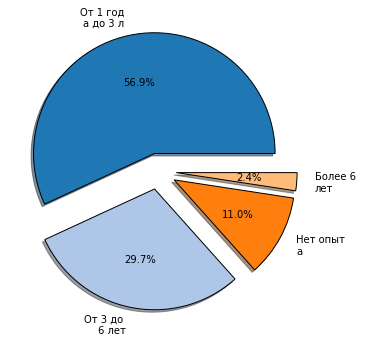

In [36]:
print_pie(df['experience'],
          size=4,
          figsize=(16,20),
          legend=False)

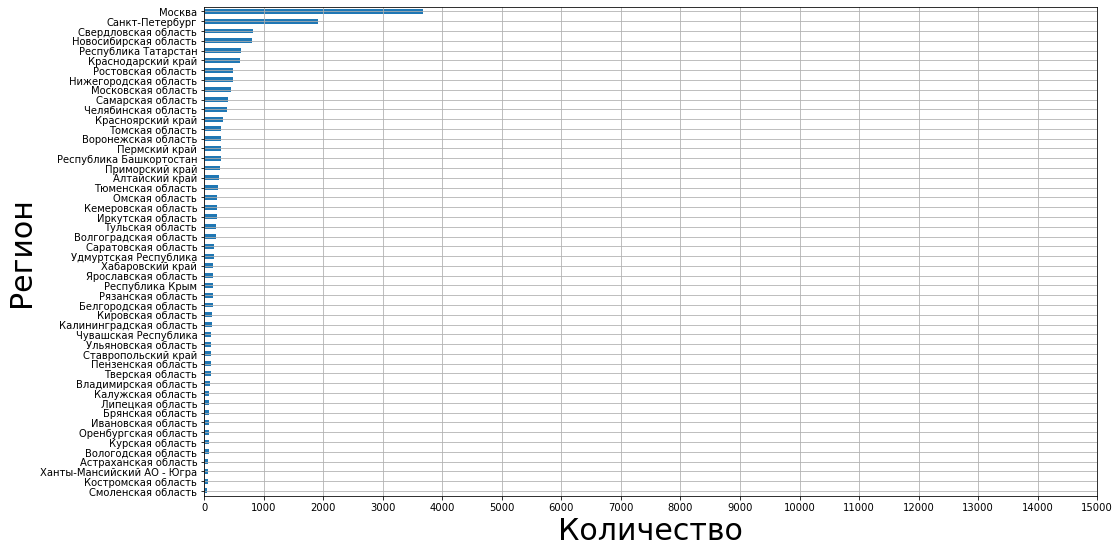

In [37]:
plt.figure(figsize=(16,9))
df['region'].value_counts()[:50][::-1].plot.barh()

plt.grid()
plt.xticks(ticks=[i*1000 for i in range(16)])
plt.ylabel('Регион', fontsize=30)
plt.xlabel('Количество',fontsize=30)
plt.show()

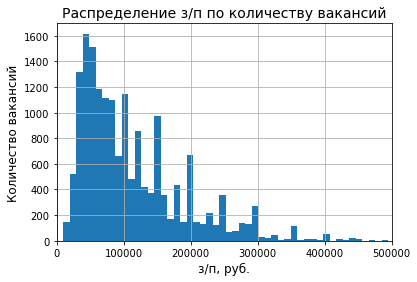

In [38]:
df['salary'].hist(bins=50)
plt.title("Распределение з/п по количеству вакансий", fontsize = 14)
plt.ylabel('Количество вакансий', fontsize = 12)
plt.xlabel('з/п, руб.', fontsize = 12)
plt.xlim((0,500000))
plt.show()

## 4. Гипотеза о виде распределения

#### Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности, уровень значимости полагаем равным 0,05

In [39]:
# Коэффициент ассиметрии, у нормально распределенной выборки он равен 0 (возможны отклонения ±1)
print(f"Коэффициент асимметрии - {df['salary'].skew()}")

# Коэффициент эксцесса, у нормально распределенной выборки он равен 3 (возможны отклонения ±1)
print(f"Коэффициент эксцесса - {df['salary'].kurtosis()}")

# Тест д'Агостино
print( stats.normaltest(df['salary']) )

Коэффициент асимметрии - 1.3225204463836682
Коэффициент эксцесса - 1.6624123127739883
NormaltestResult(statistic=3685.7321711678433, pvalue=0.0)


#### Данная выборка не подчиняется нормальному распределению

# 5. Оценить связь между показателями

### 1. Гипотеза Н0: статистически значимые отличия в группах (опыт работы) отсутсвуют

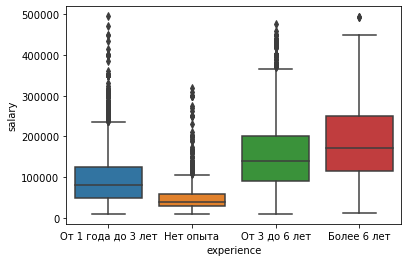

In [40]:
sns.boxplot(x='experience', y='salary', data=df)
plt.show()

In [41]:
stats.mstats.kruskalwallis(*[df[df['experience'] == exp]['salary'].values for exp in df['experience'].unique()])

KruskalResult(statistic=4315.080292086793, pvalue=0.0)

#### Так как полученное значение p-value < 0.05 (уровень значимости), гипотеза Н0 отвергается. Следовательно опыт работы значительно влияет заработную плату.

### 2. Гипотеза Н0: статистически значимые отличия в группах (регион) отсутсвуют

In [42]:
df_region_d = pd.get_dummies(df['region'])
name_to_code_region = {item:f'r{i}' for i, item in enumerate(df_region_d.columns)}
code_to_name_region = {f'r{i}': item for i, item in enumerate(df_region_d.columns)}
df_region_d.rename(columns=name_to_code_region,inplace=True)
df_regression = pd.concat([ df['salary'], df_region_d],axis=1)

df_regression.head(2)

,salary,r0,r1,r2,r3,r4,r5,r6,r7,r8,...,r70,r71,r72,r73,r74,r75,r76,r77,r78,r79
0,37500.000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20000.000,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
resultsm = smf.ols(f'salary ~ {" + ".join(df_regression.columns[1:])}', data=df_regression).fit()
pd.read_html(resultsm.summary().tables[0].as_html(),header=None,index_col=0)[0]
# Prob (F-statistic):  -- p-value

,1,2,3
0,,,
Dep. Variable:,salary,R-squared:,0.137
Model:,OLS,Adj. R-squared:,0.133
Method:,Least Squares,F-statistic:,34.440
Date:,"Tue, 11 Oct 2022",Prob (F-statistic):,0.000
Time:,17:10:59,Log-Likelihood:,-217190.000
No. Observations:,17233,AIC:,434500.000
Df Residuals:,17153,BIC:,435200.000
Df Model:,79,NaN,NaN
Covariance Type:,nonrobust,NaN,NaN


#### Так как полученное значение p-value < 0.05 (уровень значимости), гипотеза Н0 отвергается. Следовательно регион значительно влияет на заработную плату.

### 3. Гипотеза Н0: статистически значимые отличия в группах (тип занятости) отсутсвуют

In [44]:
df_schedule_d = pd.get_dummies(df['schedule'])
name_to_code_schedule = {item:f's{i}' for i, item in enumerate(df_schedule_d.columns)}
code_to_name_schedule = {f's{i}': item for i, item in enumerate(df_schedule_d.columns)}
df_schedule_d.rename(columns=name_to_code_schedule,inplace=True)
df_regression = pd.concat([ df['salary'], df_schedule_d],axis=1)

df_regression.head(2)

,salary,s0,s1,s2,s3,s4
0,37500.000,0,0,1,0,0
2,20000.000,0,0,1,0,0


In [45]:
resultsm = smf.ols(f'salary ~ {" + ".join(df_regression.columns[1:])}', data=df_regression).fit()
resultsm.summary()
# Prob (F-statistic):  -- p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     438.4
Date:                Tue, 11 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:10:59   Log-Likelihood:            -2.1742e+05
No. Observations:               17233   AIC:                         4.349e+05
Df Residuals:                   17227   BIC:                         4.349e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.819e+16   7.69e+16      0.757      0.449   -9.25e+16    2.09e+17
s0         -5.819e+16   7.69e+16     -0.757      0.449   -2.09e+17    9.25e+16
s1         -5.819e+16   7.69e+16     -0.757      0.449   -2.09e+17    9.25e+16
s2         -5.819e+16   7.69e+16     -0.757      0.449   -2.09e+17    9.25e+16
s3         -5.819e+16   7.69e+16     -0.757      0.449   -2.09e+17    9.25e+16
s4         -5.819e+16   7.69e+16     -0.757      0.449   -2.09e+17    9.25e+16
==============================================================================
Omnibus:                     3737.920   Durbin-Watson:                   1.416
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7939.066
Skew:                           1.268   Prob(JB):                         0.00
Kurtosis:                       5.150   Cond. No.                     4.33e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Так как полученное значение p-value < 0.05 (уровень значимости), гипотеза Н0 отвергается. Следовательно (тип занятости) значительно влияет на заработную плату.

### 4. Гипотеза Н0: статистически значимые отличия в группах (навыки) отсутсвуют

In [46]:
# Удалим навыки, встречающиеся реже 100 раз.
skills = df['skills'].explode('skills').value_counts()
skills = skills[skills>100].index
def clear_skills(data):
    arr = []
    for i in data:
        if i in skills:
            arr.append(i)
    if len(arr) > 0:
        return tuple(arr)
    else:
        return np.nan
df_tmp = df.copy(deep=True)
df_tmp['skills'] = df_tmp['skills'].apply(clear_skills)
df_tmp = df_tmp.dropna()

In [47]:
mlb = MultiLabelBinarizer()

df_skills_d = pd.DataFrame(mlb.fit_transform(df_tmp['skills']),columns=mlb.classes_, index=df_tmp.index)
name_to_code_skills = {item:f'sk{i}' for i, item in enumerate(df_skills_d.columns)}
code_to_name_skills = {f'sk{i}': item for i, item in enumerate(df_skills_d.columns)}
df_skills_d.rename(columns=name_to_code_skills,inplace=True)
df_regression = pd.concat([ df_tmp['salary'], df_skills_d],axis=1)

df_regression.head(2)

,salary,sk0,sk1,sk2,sk3,sk4,sk5,sk6,sk7,sk8,...,sk146,sk147,sk148,sk149,sk150,sk151,sk152,sk153,sk154,sk155
0,37500.000,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,20000.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
resultsm = smf.ols(f'salary ~ {" + ".join(df_regression.columns[1:])}', data=df_regression).fit()
pd.read_html(resultsm.summary().tables[0].as_html(),header=None,index_col=0)[0]
# Prob (F-statistic):  -- p-value

,1,2,3
0,,,
Dep. Variable:,salary,R-squared:,0.374
Model:,OLS,Adj. R-squared:,0.367
Method:,Least Squares,F-statistic:,57.180
Date:,"Tue, 11 Oct 2022",Prob (F-statistic):,0.000
Time:,17:10:59,Log-Likelihood:,-188110.000
No. Observations:,15101,AIC:,376500.000
Df Residuals:,14944,BIC:,377700.000
Df Model:,156,NaN,NaN
Covariance Type:,nonrobust,NaN,NaN


#### Так как полученное значение p-value < 0.05 (уровень значимости), гипотеза Н0 отвергается. Следовательно (навыки) значительно влияют на заработную плату.

### 4. Гипотеза Н0: статистически значимые отличия в группах (специализация) отсутсвуют

In [49]:
df_spec_d = pd.DataFrame(mlb.fit_transform(df['specializations']),columns=mlb.classes_, index=df.index)
name_to_code_spec = {item:f'sp{i}' for i, item in enumerate(df_spec_d.columns)}
code_to_name_spec = {f'sp{i}': item for i, item in enumerate(df_spec_d.columns)}
df_spec_d.rename(columns=name_to_code_spec,inplace=True)
df_regression = pd.concat([ df['salary'], df_spec_d],axis=1)

df_regression.head(2)

,salary,sp0,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,...,sp157,sp158,sp159,sp160,sp161,sp162,sp163,sp164,sp165,sp166
0,37500.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20000.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
resultsm = smf.ols(f'salary ~ {" + ".join(df_regression.columns[1:])}', data=df_regression).fit()
pd.read_html(resultsm.summary().tables[0].as_html(),header=None,index_col=0)[0]
# Prob (F-statistic):  -- p-value

,1,2,3
0,,,
Dep. Variable:,salary,R-squared:,0.171
Model:,OLS,Adj. R-squared:,0.166
Method:,Least Squares,F-statistic:,33.710
Date:,"Tue, 11 Oct 2022",Prob (F-statistic):,0.000
Time:,17:11:00,Log-Likelihood:,-216840.000
No. Observations:,17233,AIC:,433900.000
Df Residuals:,17127,BIC:,434700.000
Df Model:,105,NaN,NaN
Covariance Type:,nonrobust,NaN,NaN


#### Так как полученное значение p-value < 0.05 (уровень значимости), гипотеза Н0 отвергается. Следовательно (специализация) значительно влияют на заработную плату.

## 6. Регрессионная модель

In [51]:
# Закодируем данные для дальнейшего построения регрессии.

df_exp_d = df['experience'].map({'Нет опыта': 0, 'От 1 года до 3 лет': 1, 'От 3 до 6 лет': 3, 'Более 6 лет': 6})

df_name_d = pd.get_dummies(df['name'])
name_to_code_name = {item:f'n{i}' for i, item in enumerate(df_name_d.columns)}
code_to_name_name = {f'n{i}': item for i, item in enumerate(df_name_d.columns)}
df_name_d.rename(columns=name_to_code_name,inplace=True)

df_skills_d = pd.DataFrame(mlb.fit_transform(df['skills']),columns=mlb.classes_, index=df.index)
name_to_code_skills = {item:f'sk{i}' for i, item in enumerate(df_skills_d.columns)}
code_to_name_skills = {f'sk{i}': item for i, item in enumerate(df_skills_d.columns)}
df_skills_d.rename(columns=name_to_code_skills,inplace=True)

df_regression = pd.concat([ df['salary'], df_skills_d, df_exp_d, df_region_d, df_spec_d, df_name_d, df_schedule_d ],axis=1)
df_regression.head(2)

,salary,sk0,sk1,sk2,sk3,sk4,sk5,sk6,sk7,sk8,...,n3927,n3928,n3929,n3930,n3931,s0,s1,s2,s3,s4
0,37500.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,20000.000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
# Получим значения коэфициентов по всем признакам.
df_coef = pd.DataFrame()
count = 1000
for i in range(100):
    start = 1 + i*count
    end = count+i*count;
    
    if (end >= df_regression.columns.size):
        end = df_regression.columns.size - 1;
    if (start >= end):
        break
        
    resultsm = smf.ols(f'salary ~ {" + ".join(df_regression.columns[start:end])}', data=df_regression).fit()
    df_coef = pd.concat([df_coef,pd.read_html(resultsm.summary().tables[1].as_html(),header=0,index_col=0)[0][1:]])
    # print(f"[{start}, {end}]",end=",")

In [53]:
# Построим модель на основание 1200 самых значемых признаков.
coef = df_coef.sort_values('P>|t|')[:1200].index
resultsm = smf.ols(f'salary ~ {" + ".join(coef)}', data=df_regression).fit()
pd.read_html(resultsm.summary().tables[0].as_html(),header=None,index_col=0)[0]

,1,2,3
0,,,
Dep. Variable:,salary,R-squared:,0.729
Model:,OLS,Adj. R-squared:,0.709
Method:,Least Squares,F-statistic:,37.490
Date:,"Tue, 11 Oct 2022",Prob (F-statistic):,0.000
Time:,17:11:39,Log-Likelihood:,-207210.000
No. Observations:,17233,AIC:,416700.000
Df Residuals:,16080,BIC:,425700.000
Df Model:,1152,NaN,NaN
Covariance Type:,nonrobust,NaN,NaN


### Построена регрессионная модель с высоким кофициентом детерминации(0.722).

# Вывод: все выбранные признаки имеют высокую статистическую значимость.